<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/02-clustering/Clustering_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

To appreicate the bells and whistles of different clustering techniques, it is best to first play with some synthetic data.

## Let's create some data

In [14]:
import pandas as pd
import seaborn as sns

Let's create two clusters.

<Axes: xlabel='x', ylabel='y'>

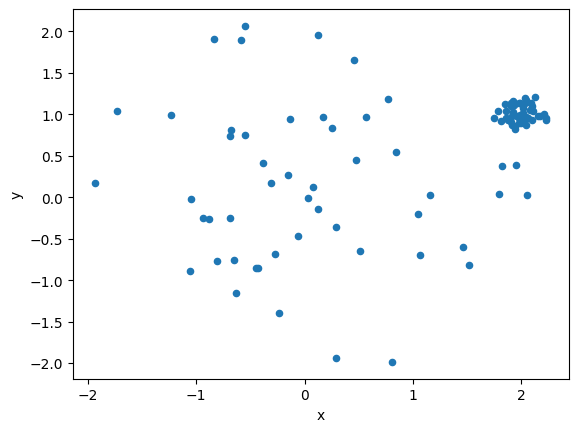

In [21]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=[[0,0]], n_features=2,  cluster_std = 1)
df = pd.DataFrame(X, columns=['x', 'y'])

X, _ = make_blobs(n_samples=50, centers=[[2,1]], n_features=2,  cluster_std = 0.1)
df2 = pd.DataFrame(X, columns=['x', 'y'])

df = pd.concat([df, df2], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

<Axes: xlabel='x', ylabel='y'>

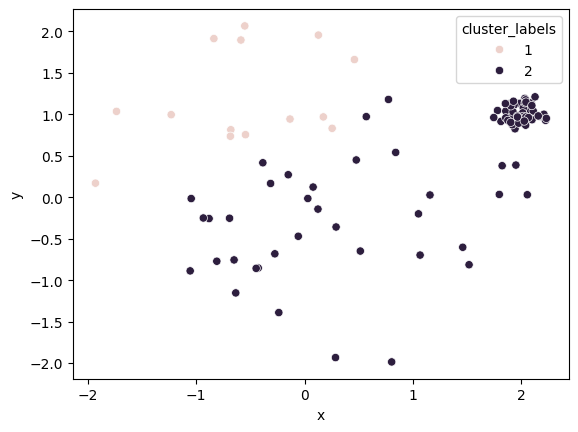

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

n_clusters = 2

Z = linkage(df, 'ward') #Try different ones.
df['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust')

sns.scatterplot(df, x='x', y='y', hue='cluster_labels')

Plot the dendrogram

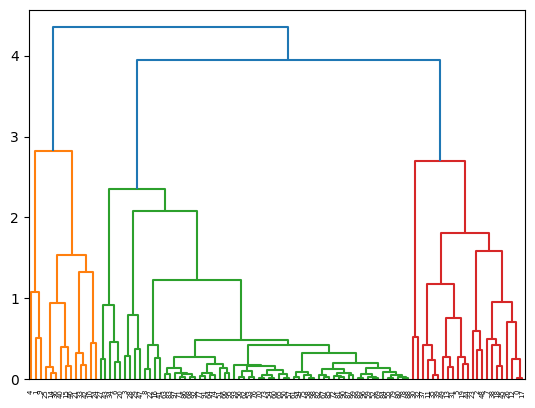

In [36]:
from scipy.cluster.hierarchy import dendrogram
_ = dendrogram(Z)

## Cluster Analysis - Kmeans

Let's compare the hierarchial clustering result with k-means

In [37]:
from sklearn.cluster import KMeans

In [38]:
df_kmeans = df.drop('cluster_labels', axis=1)

Find the cluster centroids

In [40]:
kmeans_result = KMeans(n_clusters,init='random').fit(df_kmeans)  #, init = [[2, 1 ],[0, 0]]

In [41]:
kmeans_result.cluster_centers_

array([[ 1.88105567,  0.87243123],
       [-0.33686193,  0.07975399]])

Assign each point to its cluster

In [42]:
df_kmeans['cluster_labels'] = kmeans_result.labels_

Plot the clustering

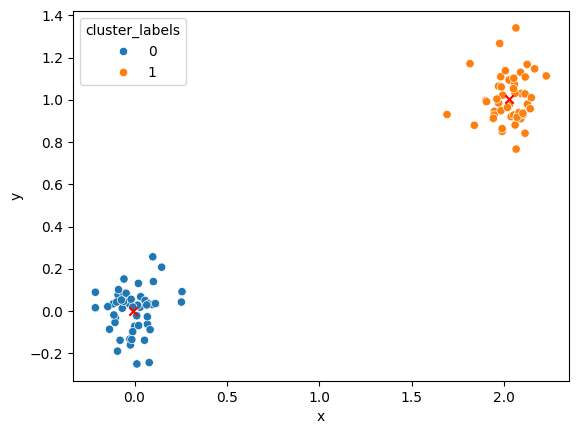

In [ ]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df_kmeans)

#plot centroids
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], color='red', marker='x')

# Show the plot with the new points
plt.show()

## Let's try 3D data

Let's create some 3D data and use it for k-means using.

In [48]:
import numpy as np

# First distribution

num_samples = 100
centers = [[0, 0, 0]]
cluster_std = [[1, np.sqrt(2), 1]]

samples, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [49]:
# Second distribution

num_samples = 100
centers = [[3, 3, 3]]
cluster_std = [[np.sqrt(2), 1, 1]]

samples2, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [50]:
# Third distribution

num_samples = 150
centers = [[5, 5, 5]]
cluster_std = [[0.5,1,0.5]]

samples3, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

Let's put all samples together in a dataframe

In [51]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [52]:
df_3d

,x,y,z
0,0.955675,-0.791114,-0.733289
1,0.154806,-1.778560,0.568946
2,-0.476525,-2.153353,0.749923
3,1.483031,1.122098,0.433000
4,2.882846,0.192395,0.447700
...,...,...,...
145,5.696119,3.789662,5.887982
146,5.291744,3.847457,5.031250
147,5.670715,5.637634,4.653365
148,5.879354,6.450503,5.602512


Let's [plot it](https://plotly.com/python/3d-scatter-plots/) in 3D.

In [53]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [54]:
Z = linkage(df_3d, 'ward')
df_3d['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

In [55]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [56]:
kmeans_result = KMeans(3,init='random').fit(df_3d[['x', 'y', 'z']])

In [57]:
df_3d['cluster_labels'] = kmeans_result.labels_
df_3d

,x,y,z,cluster_labels
0,0.955675,-0.791114,-0.733289,2
1,0.154806,-1.778560,0.568946,2
2,-0.476525,-2.153353,0.749923,2
3,1.483031,1.122098,0.433000,2
4,2.882846,0.192395,0.447700,2
...,...,...,...,...
145,5.696119,3.789662,5.887982,1
146,5.291744,3.847457,5.031250,1
147,5.670715,5.637634,4.653365,1
148,5.879354,6.450503,5.602512,1


In [58]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3)
fig.show()

##Things we could try:


1.   What if we make the data non-Gaussian? Try [generating swiss rolls or curves](https://scikit-learn.org/1.5/datasets/sample_generators.html#generators-for-manifold-learning).
2.   Trying different densities, sizes, number of clusters, initialization, etc.
